<a href="https://colab.research.google.com/github/olcaykursun/Algorithms/blob/main/Fall2024/dfs_karate_recursive_and_iterative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

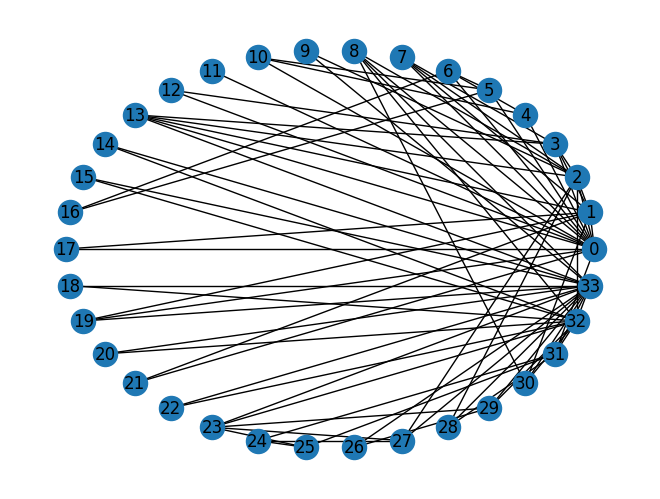

34 78


In [1]:
import matplotlib.pyplot as plt
import networkx as nx

#https://en.wikipedia.org/wiki/Zachary%27s_karate_club
G = nx.karate_club_graph()
nx.draw_circular(G, with_labels=True)
plt.show()

n = G.number_of_nodes()
m = G.number_of_edges()
print(n,m)


In [2]:
D = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc.
nodelabels = {k: 'U' for k in G.nodes}
edgelabels = {k: 'U' for k in G.edges}
nextlabel = 0  # Initialize nextlabel globally or pass as an argument

def dfs(node):
    global nextlabel
    nextlabel += 1
    nodelabels[node] = nextlabel

    # Iterate over each neighbor of the current node
    for neigh in G.neighbors(node):
        edge = (node, neigh)

        # Ensure edge is treated correctly in undirected graphs
        if edge not in edgelabels:
            edge = (neigh, node)

        if nodelabels[neigh] == 'U':
            edgelabels[edge] = 'T'  # Mark as a tree edge
            D.add_edge(*edge, color='r')  # Add tree edge in red
            dfs(neigh)  # Recur for the neighbor
        else:
            if edgelabels[edge] == 'U':
                edgelabels[edge] = 'B'  # Mark as a back edge
                D.add_edge(*edge, color='b')  # Add back edge in blue

def DFS():
    global nextlabel
    nextlabel = 0  # Reset label counter

    for node in G.nodes:
        if nodelabels[node] == 'U':  # If node is unvisited
            dfs(node)

DFS()
E=D

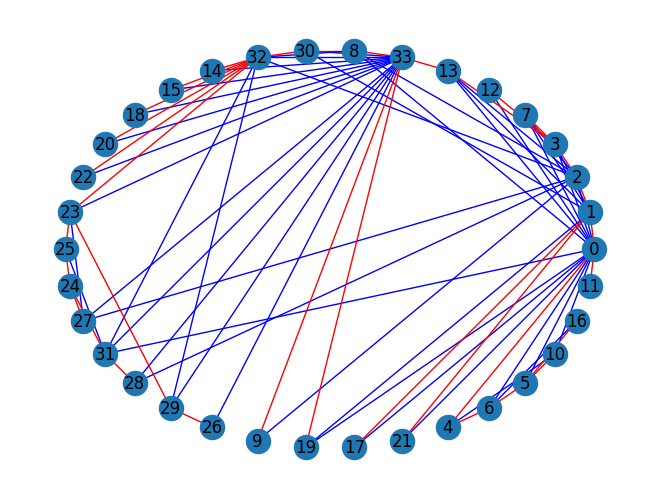

In [3]:
colors = [D[u][v]['color'] for u,v in D.edges]
nx.draw_circular(D, with_labels=True, edge_color=colors)
plt.show()


In [4]:
D = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc.
nodelabels = {k: 'U' for k in G.nodes}
edgelabels = {k: 'U' for k in G.edges}
nextlabel = 0  # Initialize nextlabel globally or pass as an argument

def dfs_iterative(start_node):
    global nextlabel
    stack = [start_node]  # Initialize the stack with the starting node

    while stack:
        node = stack[-1]  # Peek at the top node but don't pop it yet

        if nodelabels[node] == 'U':  # Only process unvisited nodes
            nextlabel += 1
            nodelabels[node] = nextlabel

        # Explore neighbors
        all_neighbors_visited = True
        for neigh in G.neighbors(node):
            edge = (node, neigh)
            if edge not in edgelabels:
                edge = (neigh, node)

            if nodelabels[neigh] == 'U':
                edgelabels[edge] = 'T'  # Mark as tree edge
                D.add_edge(*edge, color='r')  # Add tree edge in red
                stack.append(neigh)  # Push the neighbor onto the stack
                all_neighbors_visited = False
                break  # Break after visiting the first unvisited neighbor
            else:
                if edgelabels[edge] == 'U':
                    edgelabels[edge] = 'B'  # Mark as back edge
                    D.add_edge(*edge, color='b')  # Add back edge in blue

        # If all neighbors are visited, we can pop the node from the stack
        if all_neighbors_visited:
            stack.pop()

def DFS():
    global nextlabel
    nextlabel = 0  # Reset label counter

    for node in G.nodes:
        if nodelabels[node] == 'U':  # If node is unvisited
            dfs_iterative(node)  # Use the iterative DFS instead of the recursive one

DFS()


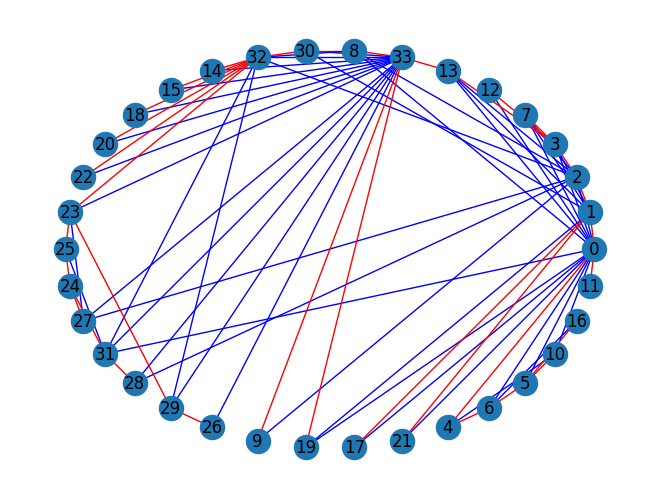

In [5]:
colors = [D[u][v]['color'] for u,v in D.edges]
nx.draw_circular(D, with_labels=True, edge_color=colors)
plt.show()
